## Question 1 :
Given the Bank loan data set which contains both customer information and customer
response to the last personal loan campaign like age, experience, income, education,
personal loan etc. Perform EDA and develop a classifier using Logistic Regression that
will help the bank to identify the potential customers who are more likely to purchase
the loan. Predict whether a customer having CCAvg of 6.45 will purchase the loan or
not. Also evaluate the classifier performance.

##### ANS :

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [4]:
data = pd.read_excel("D:/Downloads/ML_LAB/ML_Lab - 6/Bank_Personal_Loan_Modelling.xlsx")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
data["Personal Loan"].value_counts()  # classes imbalance

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE
x = data.drop('Personal Loan', axis = 1)
y = data['Personal Loan']
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print(x_resampled.shape, y_resampled.shape)

(9040, 13) (9040,)


In [14]:
y_resampled.value_counts()

Personal Loan
0    4520
1    4520
Name: count, dtype: int64

In [19]:
corr = x_resampled.corrwith(y_resampled)
#print(corr.sort_values(ascending=False))
corr

ID                   -0.037294
Age                  -0.035271
Experience           -0.034097
Income                0.749675
ZIP Code              0.002754
Family               -0.043743
CCAvg                 0.546179
Education             0.062254
Mortgage              0.167027
Securities Account   -0.158190
CD Account            0.133276
Online               -0.207770
CreditCard           -0.218540
dtype: float64

In [49]:
X = corr.sort_values(ascending=False)[:5]
X

Income        0.749675
CCAvg         0.546179
Mortgage      0.167027
CD Account    0.133276
Education     0.062254
dtype: float64

In [51]:
x = []
for i in X.index:
    x.append(i)
x

['Income', 'CCAvg', 'Mortgage', 'CD Account', 'Education']

In [53]:
X = x_resampled[x]
print(X.shape, y_resampled.shape)

(9040, 5) (9040,)


In [72]:
X.head()

,Income,CCAvg,Mortgage,CD Account,Education
0,49,1.6,0,0,1
1,34,1.5,0,0,1
2,11,1.0,0,0,1
3,100,2.7,0,0,2
4,45,1.0,0,0,2


In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y_resampled, test_size=0.2, random_state=42, stratify = y_resampled)

In [57]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(x_test)

In [61]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       904
           1       0.87      0.90      0.89       904

    accuracy                           0.88      1808
   macro avg       0.88      0.88      0.88      1808
weighted avg       0.88      0.88      0.88      1808



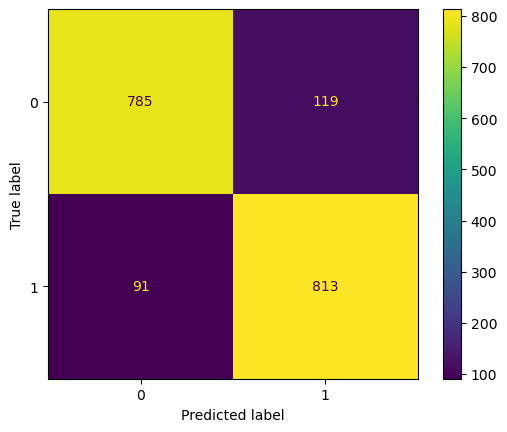

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

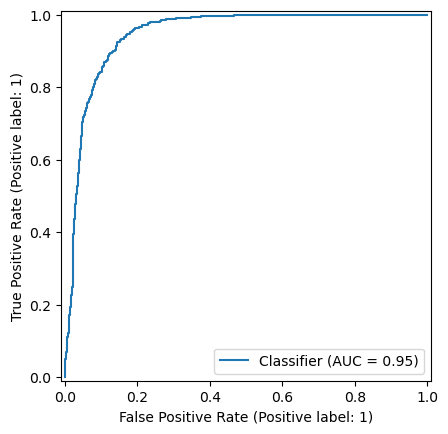

In [66]:
y_prob = model.predict_proba(x_test)[:, 1]  # Probability for ROC
RocCurveDisplay.from_predictions(y_test, y_prob)

In [94]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(x_train)
sample = X.mean().copy()
sample['CCAvg'] = 6.45

In [96]:
sample_scaled = scaler.transform([sample]) 
sample_scaled

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 4.29879276e-03,  1.85214920e+00, -4.33011289e-03,
        -2.80846491e-03,  1.54983851e-03]])

In [100]:
prediction = model.predict(sample_scaled)
print("Loan Purchase Prediction for CCAvg = 6.45:", "Yes" if prediction[0] == 1 else "No")

Loan Purchase Prediction for CCAvg = 6.45: No


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Question 2

The Lung cancer survey dataset includes various columns such as gender, age, smoking,
yellow fingers, anxiety, peer pressure etc. Perform EDA and use Logistic Regression
model to identify patterns and correlations, so that, the predictive models can provide
accurate assessments of a patient's risk of developing lung cancer. Also evaluate the
classifier performance.

##### ANS :

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [105]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/ML_Lab - 6/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [107]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [109]:
data["LUNG_CANCER"] = data["LUNG_CANCER"].apply(lambda x: 1 if x == "YES" else 0)
data["GENDER"] = data["GENDER"].apply(lambda x: 1 if x == "M" else 0)

In [111]:
correlation = data.corr()["LUNG_CANCER"].drop("LUNG_CANCER")
print(correlation)

GENDER                   0.067254
AGE                      0.089465
SMOKING                  0.058179
YELLOW_FINGERS           0.181339
ANXIETY                  0.144947
PEER_PRESSURE            0.186388
CHRONIC DISEASE          0.110891
FATIGUE                  0.150673
ALLERGY                  0.327766
WHEEZING                 0.249300
ALCOHOL CONSUMING        0.288533
COUGHING                 0.248570
SHORTNESS OF BREATH      0.060738
SWALLOWING DIFFICULTY    0.259730
CHEST PAIN               0.190451
Name: LUNG_CANCER, dtype: float64


In [113]:
data["LUNG_CANCER"].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [117]:
from imblearn.over_sampling import SMOTE
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)
print(x_resampled.shape, y_resampled.shape)

(540, 15) (540,)


In [119]:
corr = x_resampled.corrwith(y_resampled)
print(corr.sort_values(ascending=False))

ALLERGY                  0.638954
ALCOHOL CONSUMING        0.598797
COUGHING                 0.583097
WHEEZING                 0.583039
SWALLOWING DIFFICULTY    0.516793
CHEST PAIN               0.499644
PEER_PRESSURE            0.473735
YELLOW_FINGERS           0.415808
FATIGUE                  0.381547
ANXIETY                  0.377541
CHRONIC DISEASE          0.368841
SMOKING                  0.331202
GENDER                   0.271754
SHORTNESS OF BREATH      0.252191
AGE                      0.150622
dtype: float64


In [121]:
X = corr.sort_values(ascending=False)[:5]
X

ALLERGY                  0.638954
ALCOHOL CONSUMING        0.598797
COUGHING                 0.583097
WHEEZING                 0.583039
SWALLOWING DIFFICULTY    0.516793
dtype: float64

In [123]:
x = []
for i in X.index:
    x.append(i)
x

['ALLERGY ',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'WHEEZING',
 'SWALLOWING DIFFICULTY']

In [125]:
X = x_resampled[x]
print(X.shape, y_resampled.shape)

(540, 5) (540,)


In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, y_resampled, test_size=0.2, random_state=42, stratify = y_resampled)

In [129]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [131]:
y_pred = model.predict(x_test)

In [133]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.94      0.89      0.91        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108



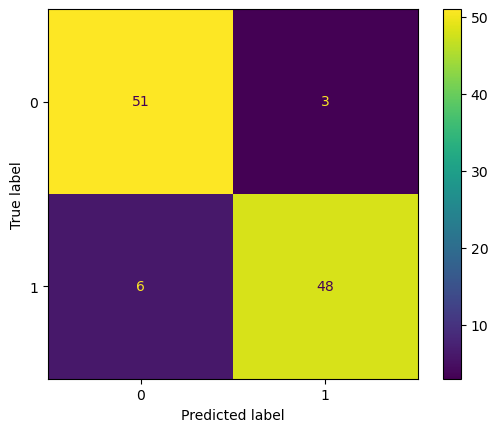

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

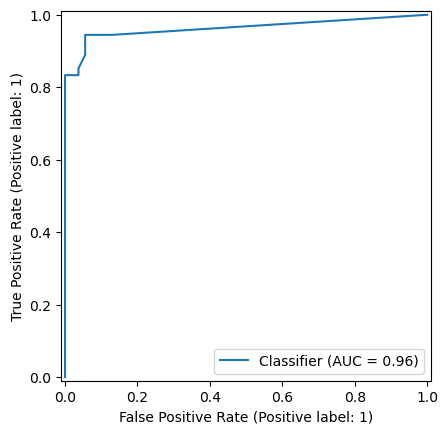

In [137]:
y_prob = model.predict_proba(x_test)[:, 1]  # Probability for ROC
RocCurveDisplay.from_predictions(y_test, y_prob)